# <center>💻 PRACTICAL DATA SCIENCE (by Prof. Stephanie Langeland) 💻</center>
# <center>📈 SUGAR-SIGHT: PROACTIVE DIABETES DETECTION 📊</center>
## <center>CRN: 23451 | SPRING 2024</center>
## <center>Submitted by: Piyush Gupta</center>

In [1]:
# STEP 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, recall_score, roc_auc_score, roc_curve, auc, precision_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# STEP 2: Set appropriate color palette for the visualizations
# According to the guidelines, we can use a colorblind-friendly palette and ensure we have good contrast.
sns.set_palette('colorblind')  # Seaborn has a colorblind-friendly palette

In [3]:
### Importing Dataset

df = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df#displaying the contents of the "Data Set".

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# <center>📈 1.Explanatory Data Analysis 📊</center>

###  Perform Explanatory Data Analysis (EDA) / indicate how features correlate among themselves, with emphasis to the target/label one

### 1. Checking the shape of the dataset - 

**The shape attribute of a DataFrame returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.**

In [5]:
df.shape

(100000, 9)

### 2. Concise summary of the DataFrame
**The df.info() method provides a concise summary of the DataFrame. This includes information like the number of non-null entries in each column, the datatype of each column, and memory usage, among others. It is particularly useful to get a quick overview of the dataset, helping identify missing values and optimize data types for more efficient storage and computation.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### 3. Viewing Data Types

**Executing df.dtypes returns a Series with the data type of each column. Understanding the data types of each column is crucial as it affects what kind of operations can be performed on the columns. It helps in identifying if any column needs a type conversion.**

In [7]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

### 4.Statistical Summary - 

**The df.describe() method is used to generate a statistical summary of the DataFrame. This includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values for all numeric columns. It is a useful method for a quick statistical overview and to understand the distribution of the data in the DataFrame.**

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


### 5. Identifying Duplicates: -

**Checks for duplicated rows in the dataset (df.duplicated()) and prints the count of such rows (duplicate.sum()) and also displays the duplicate rows (df[duplicate]). This step is crucial for data quality, as duplicates can skew the results of analyses.**

In [9]:
duplicate = df.duplicated() 
print(duplicate.sum()) 
df[duplicate] 

3854


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


### 6.Removing Duplicate Rows 

**The df.drop_duplicates(inplace=True) method is used to remove all the duplicate rows in the DataFrame. The inplace=True parameter means that the DataFrame will be modified in place, and nothing will be returned. This action is part of the data cleaning process, ensuring that the dataset has only unique entries and is ready for analysis or model training.**

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### 6. Checking for Missing Values

**It is used to count the number of missing values in each column of the DataFrame. Handling missing data is an essential step in preprocessing.**

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Double checking null values with help of heatmap**

<AxesSubplot:>

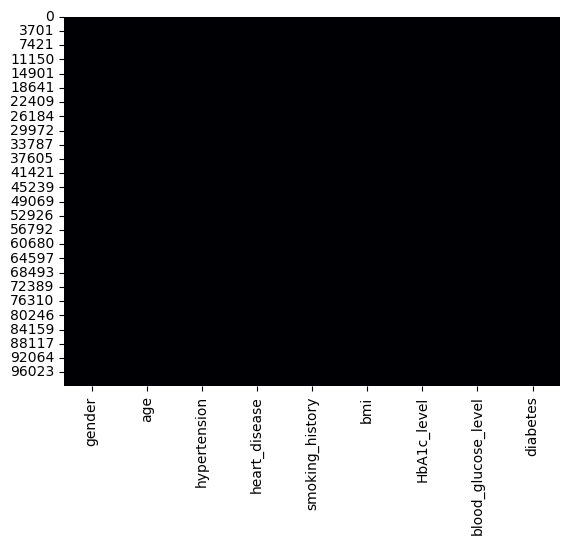

In [13]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

### 8. Unique Value Count per Column

**Count the number of unique values in each column. This helps in identifying columns with a high degree of variability, as well as those that might be categorical in nature..**

In [14]:
df.nunique(axis=0)

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [16]:
for feature in ['gender', 'smoking_history']:
    categories = df[feature].unique()
    print(feature, categories)

gender ['Female' 'Male' 'Other']
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [17]:
df = df[(df['smoking_history'] != 'No Info') & (df['smoking_history'] != 'ever')]

In [18]:
for feature in ['gender', 'smoking_history']:
    categories = df[feature].unique()
    print(feature, categories)

gender ['Female' 'Male' 'Other']
smoking_history ['never' 'current' 'former' 'not current']


In [19]:
# STEP 5: Label encoding for categorical features
# Convert 'gender' and 'smoking_history' to categories
df['gender'] = df['gender'].astype('category').cat.codes
df['smoking_history'] = df['smoking_history'].astype('category').cat.codes

C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_30336\333640634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].astype('category').cat.codes
C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_30336\333640634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].astype('category').cat.codes


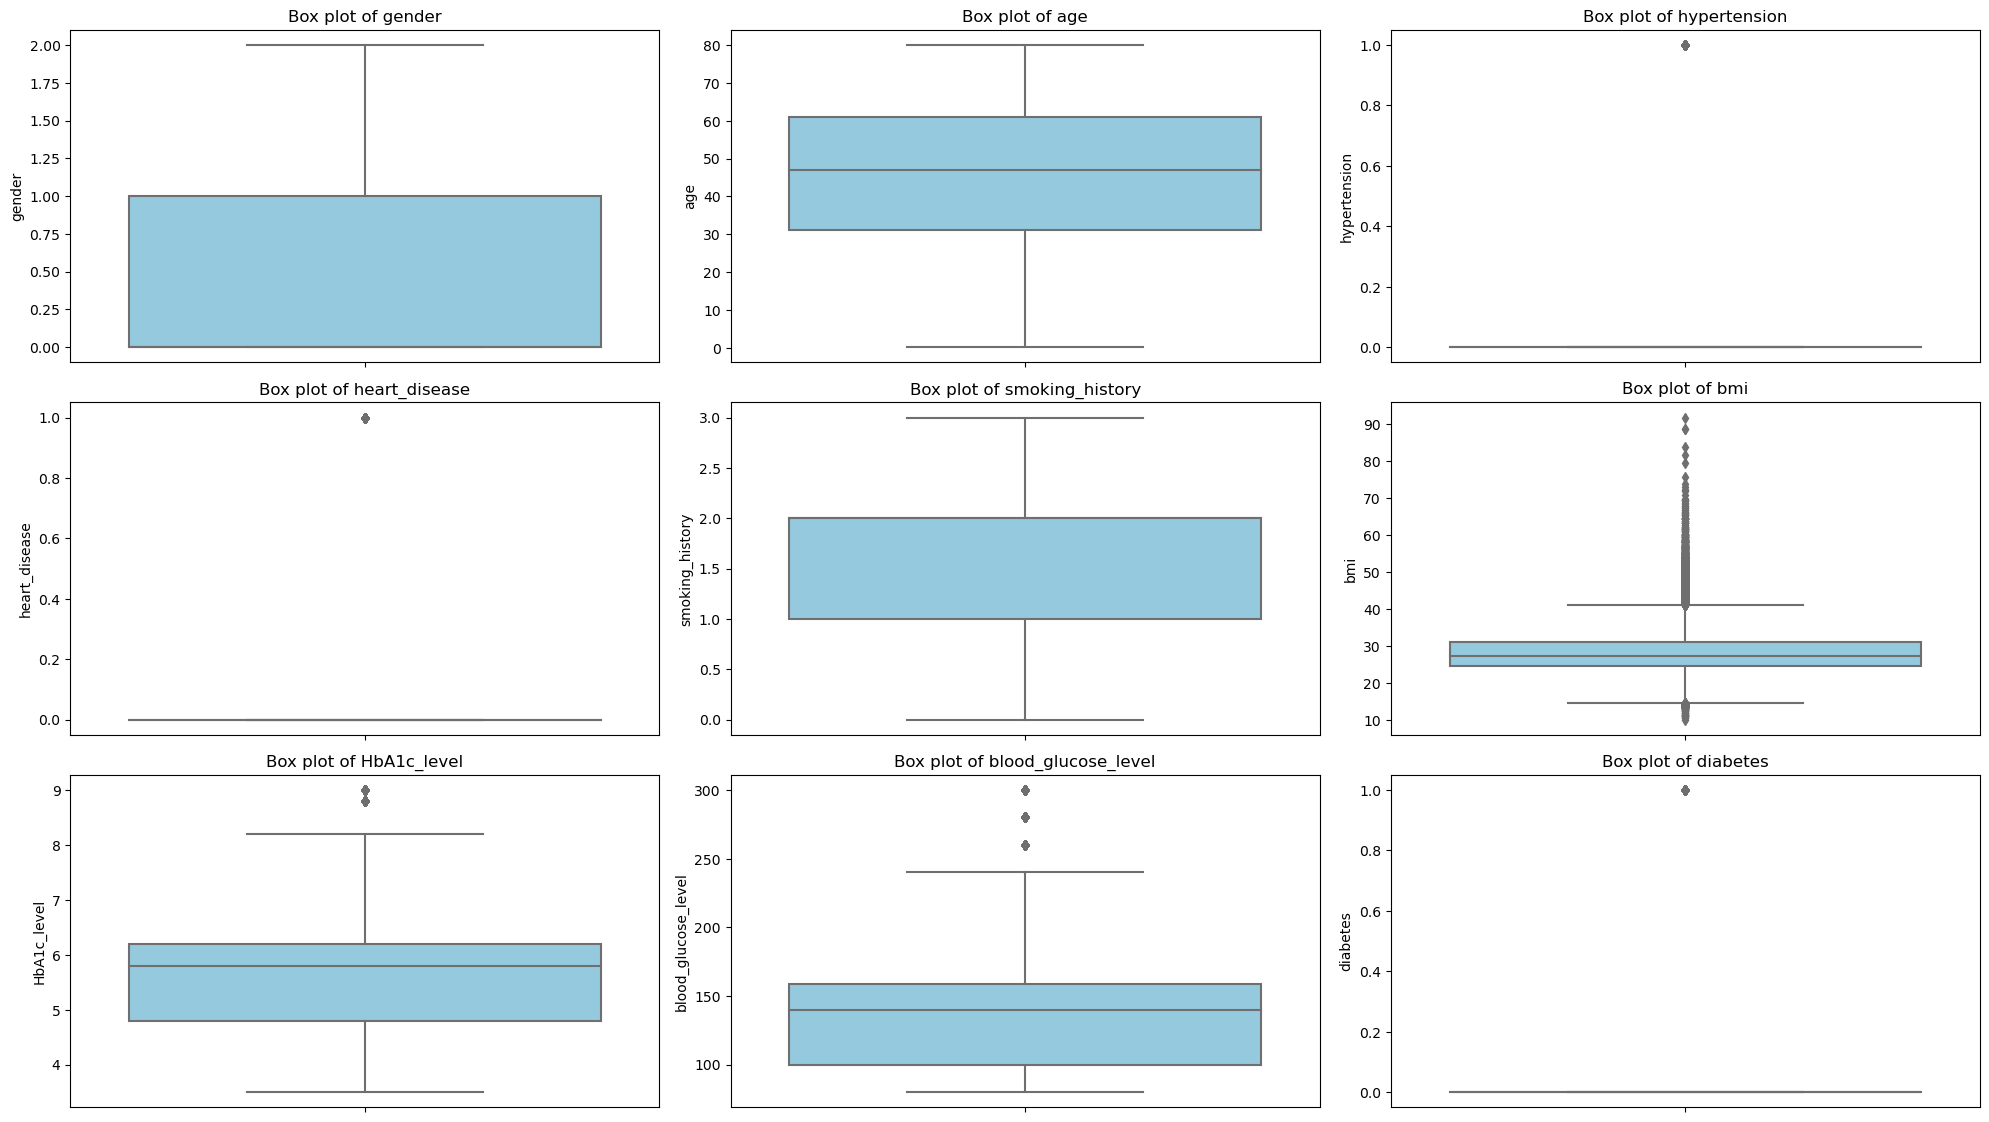

In [20]:
# STEP 8: Box plots for numerical features to identify outliers
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(y=df[feature], color='skyblue')  # 'skyblue' for a light, neutral color
    plt.title(f'Box plot of {feature}')
    plt.tight_layout()
plt.show()

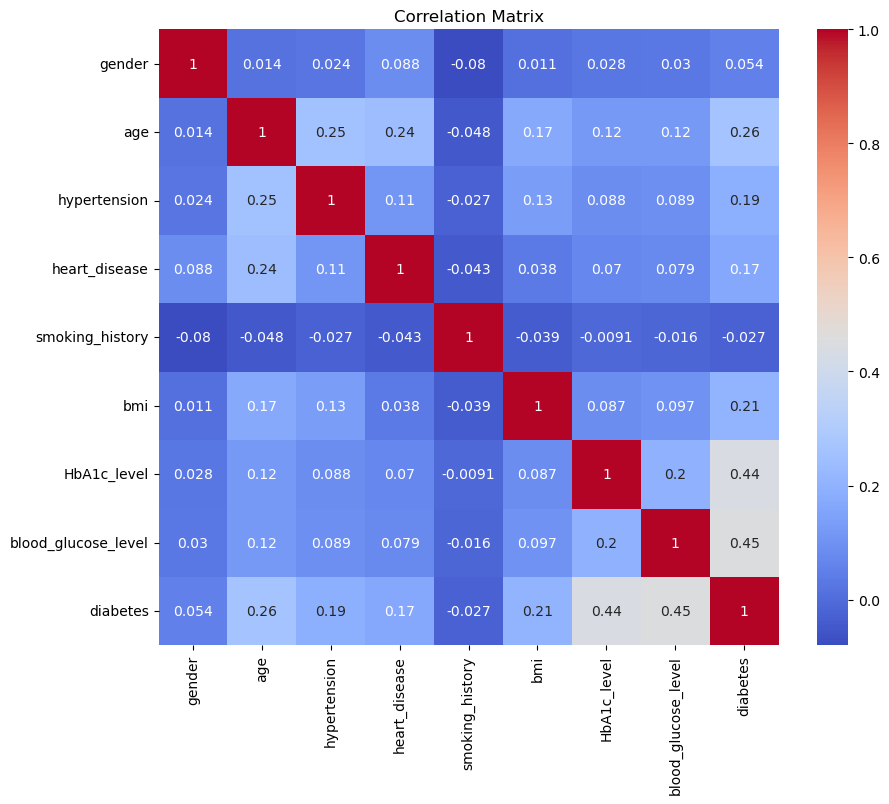

In [21]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # 'coolwarm' is intuitive for correlation
plt.title('Correlation Matrix')
plt.show()

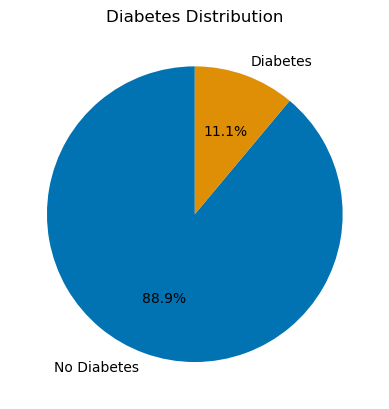

In [22]:
# STEP 7: Pie chart for diabetes distribution
counts = df['diabetes'].value_counts()
plt.pie(counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Distribution')
plt.show()

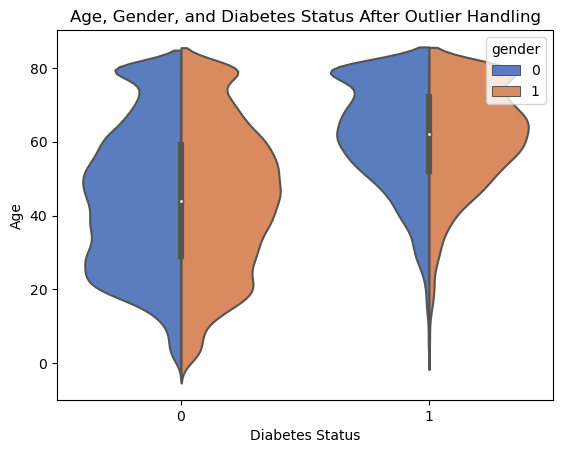

In [23]:
# Filter the data to include only two categories for 'gender'
df_filtered = df[df['gender'].isin([0, 1])]  # replace 0 and 1 with the actual category names if different

# Plotting the violin plot with the filtered data
sns.violinplot(x="diabetes", y="age", hue="gender", data=df_filtered, split=True, palette='muted')
plt.title('Age, Gender, and Diabetes Status After Outlier Handling')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()


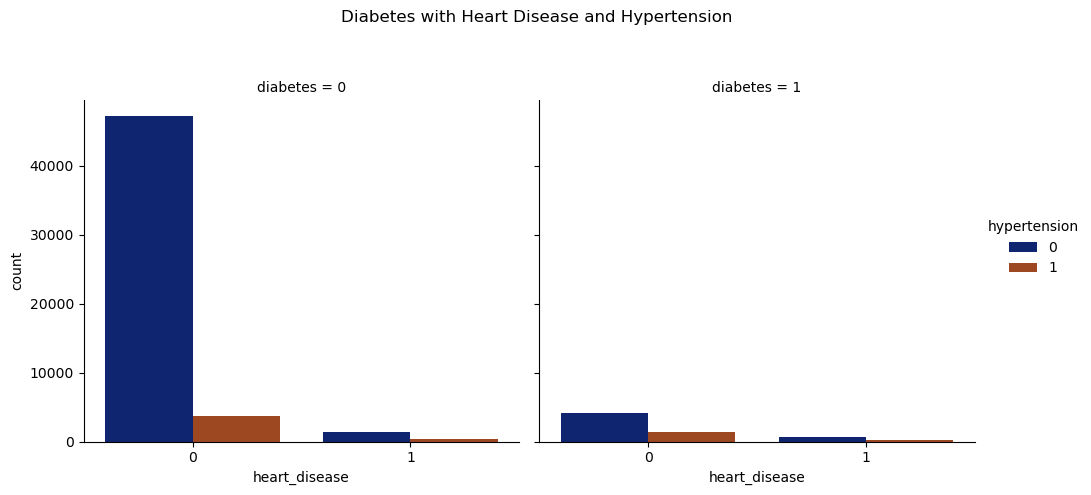

In [25]:
# STEP 10: Categorical plot for heart disease and hypertension by diabetes status
sns.catplot(x="heart_disease", hue="hypertension", col="diabetes",
            data=df, kind="count", palette='dark')
plt.subplots_adjust(top=0.8)
plt.suptitle('Diabetes with Heart Disease and Hypertension')
plt.show()

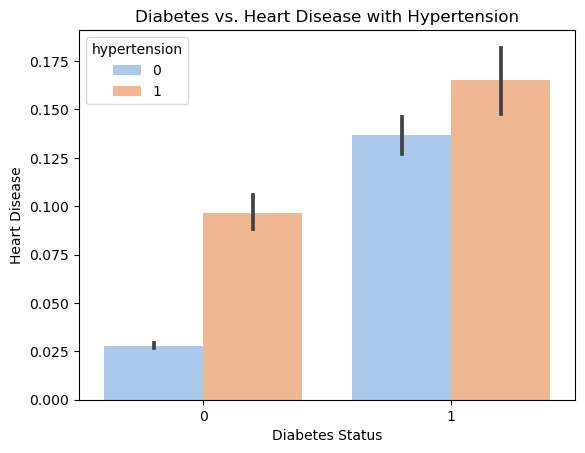

In [26]:
# STEP 11: Bar plot for the relationship between diabetes and heart disease, split by hypertension
sns.barplot(x='diabetes', y='heart_disease', hue='hypertension', data=df, palette='pastel')
plt.title('Diabetes vs. Heart Disease with Hypertension')
plt.xlabel('Diabetes Status')
plt.ylabel('Heart Disease')
plt.show()

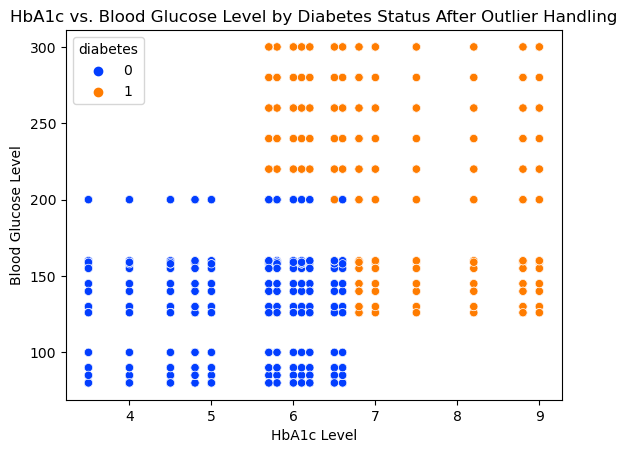

In [27]:
# STEP 14: Scatter plot for HbA1c level and blood glucose level after outlier handling
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=df, palette='bright')
plt.title('HbA1c vs. Blood Glucose Level by Diabetes Status After Outlier Handling')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.show()

### **Checking outliers in our most co-related features: 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level'**

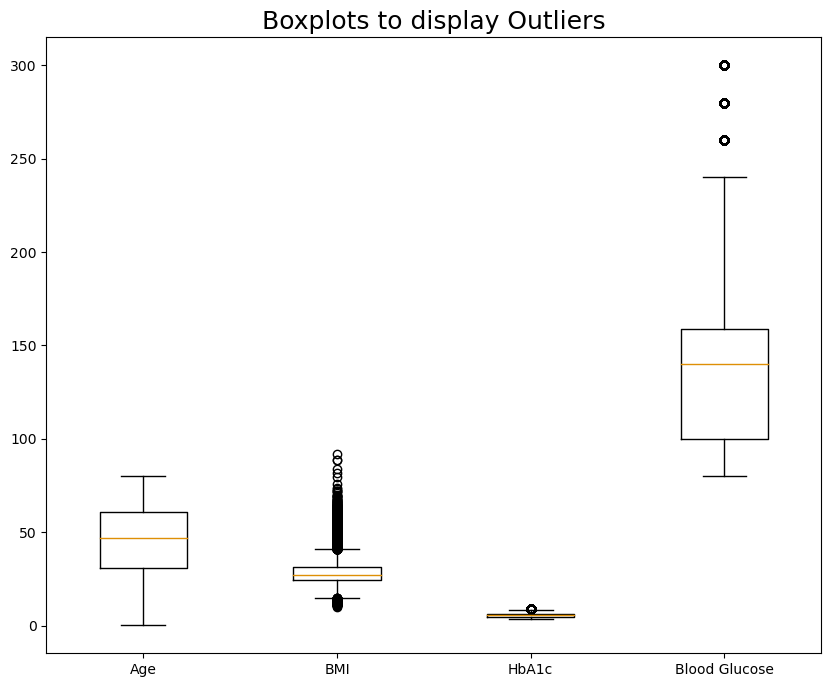

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
ax.set_xticklabels(['Age', 'BMI', 'HbA1c', 'Blood Glucose'])

plt.title('Boxplots to display Outliers', fontsize=18)

plt.show()

Created a subplot of **box plots to visualize outliers**

Visually, **BMI, HbA1c, and Blood Glucose** contain outliers since there are **instances that lay outside the whiskers**

Now we create a function **remove_outliers** to remove outliers by using the **IQR method** for the instances containing outliers

In [29]:
def remove_outliers(df, cols):
    for col in cols:
        # Calculate quartiles and IQR for the column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Identify outliers using the IQR method
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = ((df[col] < lower) | (df[col] > upper))

        # erplace outliers with NaN
        df[outliers] = pd.NA
    
    # Drop rows with NaN values
    df.dropna(inplace=True)
    
    return df

In [30]:
df = remove_outliers(df, ['bmi', 'HbA1c_level', 'blood_glucose_level'])
df.shape

C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_30336\2711917878.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[outliers] = pd.NA
C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_30336\2711917878.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(54201, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54201 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               54201 non-null  object
 1   age                  54201 non-null  object
 2   hypertension         54201 non-null  object
 3   heart_disease        54201 non-null  object
 4   smoking_history      54201 non-null  object
 5   bmi                  54201 non-null  object
 6   HbA1c_level          54201 non-null  object
 7   blood_glucose_level  54201 non-null  object
 8   diabetes             54201 non-null  object
dtypes: object(9)
memory usage: 4.1+ MB


## Data Preparation for Model Training

### Encoding Categorical Variables
Firstly, we transform categorical columns into numeric values. This is necessary because most machine learning algorithms require numerical input. We use `LabelEncoder` from `sklearn.preprocessing` to convert each category within the columns into a unique integer.

### Feature and Target Separation
Next, we separate our dataset into `features` (X) and `target` (y). The `features` are the inputs that our model will use to make predictions, and the `target` is what we want to predict. In our case, 'diabetes' is the target variable we're aiming to predict.

### Splitting the Data
We then split our data into a training set and a test set using `train_test_split`, which is a common approach in machine learning to evaluate performance. The training set is used to train the model, and the test set is used to evaluate its performance. We reserve 30% of our data for testing and use a `random_state` for reproducibility of the split.


In [34]:
# Convert categorical columns to numeric values

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

label_encoders = {}
for column in df.columns:
    if df[column].dtype == object:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split data into features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Applying oversampling to the training data
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# OR

# Applying undersampling to the training data
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)


### Addressing Class Imbalance
Due to class imbalance, where one class heavily outweighs the other, we use resampling techniques to balance our classes:

#### Oversampling
With `RandomOverSampler`, we increase the number of samples in the minority class by duplicating some of its entries. This helps to prevent our model from being biased towards the majority class.

#### Undersampling
Alternatively, `RandomUnderSampler` is used to decrease the number of samples in the majority class by randomly removing some of its entries. This can help to give the minority class more influence when training the model.

We perform either oversampling or undersampling only on the training data to prevent introducing bias in our model's evaluation.

In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X and y are your features and target variable from the dataset respectively
# X, y = load_your_data()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize oversampler and undersampler
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

# Apply oversampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Apply undersampling to the training data
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Initialize the classifier
clf = RandomForestClassifier(random_state=0)

# Train on oversampled data
clf.fit(X_train_ros, y_train_ros)
y_pred_ros = clf.predict(X_test)

# Metrics for oversampled data
accuracy_ros = accuracy_score(y_test, y_pred_ros)
precision_ros = precision_score(y_test, y_pred_ros)
recall_ros = recall_score(y_test, y_pred_ros)
f1_ros = f1_score(y_test, y_pred_ros)
confusion_matrix_ros = confusion_matrix(y_test, y_pred_ros)

# Train on undersampled data
clf.fit(X_train_rus, y_train_rus)
y_pred_rus = clf.predict(X_test)

# Metrics for undersampled data
accuracy_rus = accuracy_score(y_test, y_pred_rus)
precision_rus = precision_score(y_test, y_pred_rus)
recall_rus = recall_score(y_test, y_pred_rus)
f1_rus = f1_score(y_test, y_pred_rus)
confusion_matrix_rus = confusion_matrix(y_test, y_pred_rus)

# Print the performance metrics for oversampled data
print("Oversampling Metrics:")
print(f"Accuracy: {accuracy_ros}")
print(f"Precision: {precision_ros}")
print(f"Recall: {recall_ros}")
print(f"F1 Score: {f1_ros}")
print(f"Confusion Matrix:\n{confusion_matrix_ros}")

# Print the performance metrics for undersampled data
print("\nUndersampling Metrics:")
print(f"Accuracy: {accuracy_rus}")
print(f"Precision: {precision_rus}")
print(f"Recall: {recall_rus}")
print(f"F1 Score: {f1_rus}")
print(f"Confusion Matrix:\n{confusion_matrix_rus}")



Oversampling Metrics:
Accuracy: 0.9539388721480844
Precision: 0.7312572087658593
Recall: 0.551304347826087
F1 Score: 0.6286564204263758
Confusion Matrix:
[[14878   233]
 [  516   634]]

Undersampling Metrics:
Accuracy: 0.8446590000614969
Precision: 0.300810654313839
Recall: 0.9034782608695652
F1 Score: 0.4513466550825369
Confusion Matrix:
[[12696  2415]
 [  111  1039]]


## Train the Model:

The logistic regression model is trained on the oversampled training data (X_train_ros, y_train_ros) to deal with the class imbalance issue.

### Make Predictions:

The trained model is then used to predict outcomes on the test data (X_test).

### Calculate Performance Metrics:

Metrics like accuracy, precision, recall, and F1 score are computed to evaluate the performance of the model. The confusion matrix is also derived, giving a detailed view of the model's predictive ability.

### Output the Results:

Finally, the performance metrics are printed to provide a summary of the model's effectiveness.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the logistic regression classifier
logreg = LogisticRegression(max_iter=1000, random_state=0)

# Fit the model on the oversampled training data
logreg.fit(X_train_ros, y_train_ros)

# Predict on the test data
y_pred_logreg = logreg.predict(X_test)

# Calculate metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print the performance metrics for the logistic regression model trained on oversampled data
print("Logistic Regression with Oversampling Metrics:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"Precision: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print(f"F1 Score: {f1_logreg:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_logreg}")


Logistic Regression with Oversampling Metrics:
Accuracy: 0.83
Precision: 0.27
Recall: 0.83
F1 Score: 0.40
Confusion Matrix:
[[12483  2628]
 [  197   953]]


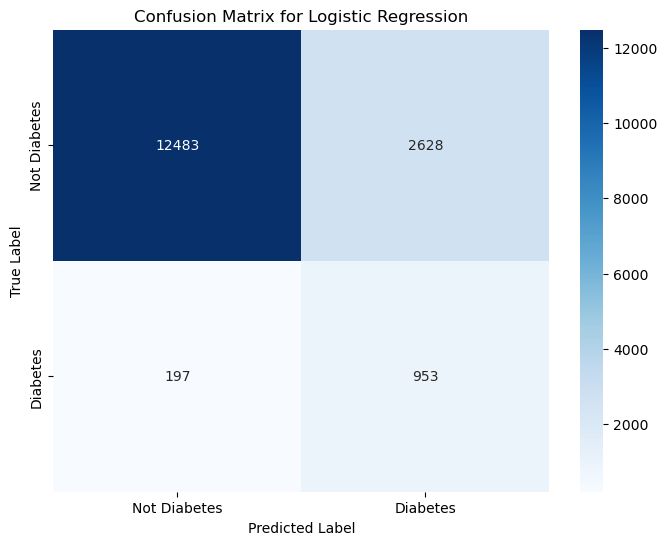

In [39]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetes', 'Diabetes'], yticklabels=['Not Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()